#  Data Analytics and Machine Learning of the Data space in Granular Flow

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)

# 1.0 Combining the data gathered for each time step into a single csv file

In [3]:
granular_flow_data_paths=[]

tot=np.arange(100,9900,100)
for i in range(tot.size):
    if i==0:
        pass
    else:
        a=[f"""./Tables(large dataset)/XYZ_Internal_Table_table_{i*100}.csv"""]
        granular_flow_data_paths+=a



granular_flow_dataset = []
for datapath in granular_flow_data_paths:
    df=pd.read_csv(datapath)
    granular_flow_dataset.append(df)


In [4]:
y=pd.concat(granular_flow_dataset)
Combined_flow_data=y.to_csv('./Combined flow data (large data).csv')
Combined_flow_data

# 2.0 Working With the Saved file

## 2.1 Reading (Loading) the combined saved data

In [5]:

Granular_flow_data= pd.read_csv('./Combined flow data (large data).csv')
Granular_flow_data

Unnamed: 0  Time (s)  Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  \
0                 0      0.02               -0.113685                0.032540   
1                 1      0.02               -0.113686                0.025651   
2                 2      0.02               -0.113689                0.024866   
3                 3      0.02               -0.113687                0.038670   
4                 4      0.02               -0.113689                0.026663   
...             ...       ...                     ...                     ...   
2549331       30688      1.94               -0.117254                0.033502   
2549332       30689      1.94               -0.117258                0.022881   
2549333       30690      1.94               -0.117269                0.031197   
2549334       30691      1.94               -0.117269                0.032247   
2549335       30692      1.94               -0.117272                0.032501   

         Parcel Centroid[Z] (m)  Particle Velocity[i] (m/s)  \
0                      0.014828                    0.576229   
1                      0.007872                    0.575964   
2                      0.018086                    0.576129   
3                      0.008284                    0.576709   
4                      0.013483                    0.576153   
...                         ...                         ...   
2549331                0.009970                    0.538780   
2549332                0.013659                    0.538740   
2549333                0.021229                    0.538617   
2549334                0.012478                    0.538617   
2549335                0.003156                    0.538576   

         Particle Velocity[j] (m/s)  Particle Velocity[k] (m/s)  \
0                      7.599137e-06                   -0.156682   
1                     -3.384995e-05                   -0.156740   
2                      8.063311e-05                   -0.156886   
3                     -4.113741e-04                   -0.155926   
4                      3.311456e-05                   -0.156845   
...                             ...                         ...   
2549331               -1.368647e-07                   -0.108018   
2549332               -1.495018e-07                   -0.107966   
2549333               -8.592227e-09                   -0.107811   
2549334               -2.634351e-08                   -0.107811   
2549335               -3.111577e-08                   -0.107759   

         Particle Velocity: Magnitude (m/s)  Volume Fraction of Phase 1  \
0                                  0.597151                    0.010824   
1                                  0.596911                    0.006975   
2                                  0.597108                    0.010824   
3                                  0.597417                    0.034522   
4                                  0.597121                    0.010824   
...                                     ...                         ...   
2549331                            0.549502                    0.085303   
2549332                            0.549452                    0.048624   
2549333                            0.549301                    0.048624   
2549334                            0.549301                    0.048624   
2549335                            0.549250                    0.085303   

         Wall Shear Stress: Magnitude (Pa)  Report: Element Count 1  \
0                                        0                     1128   
1                                        0                     1128   
2                                        0                     1128   
3                                        0                     1128   
4                                        0                     1128   
...                                    ...                      ...   
2549331                                  0                    30693   
25493

## Finding patterns in the data using correlation matrix

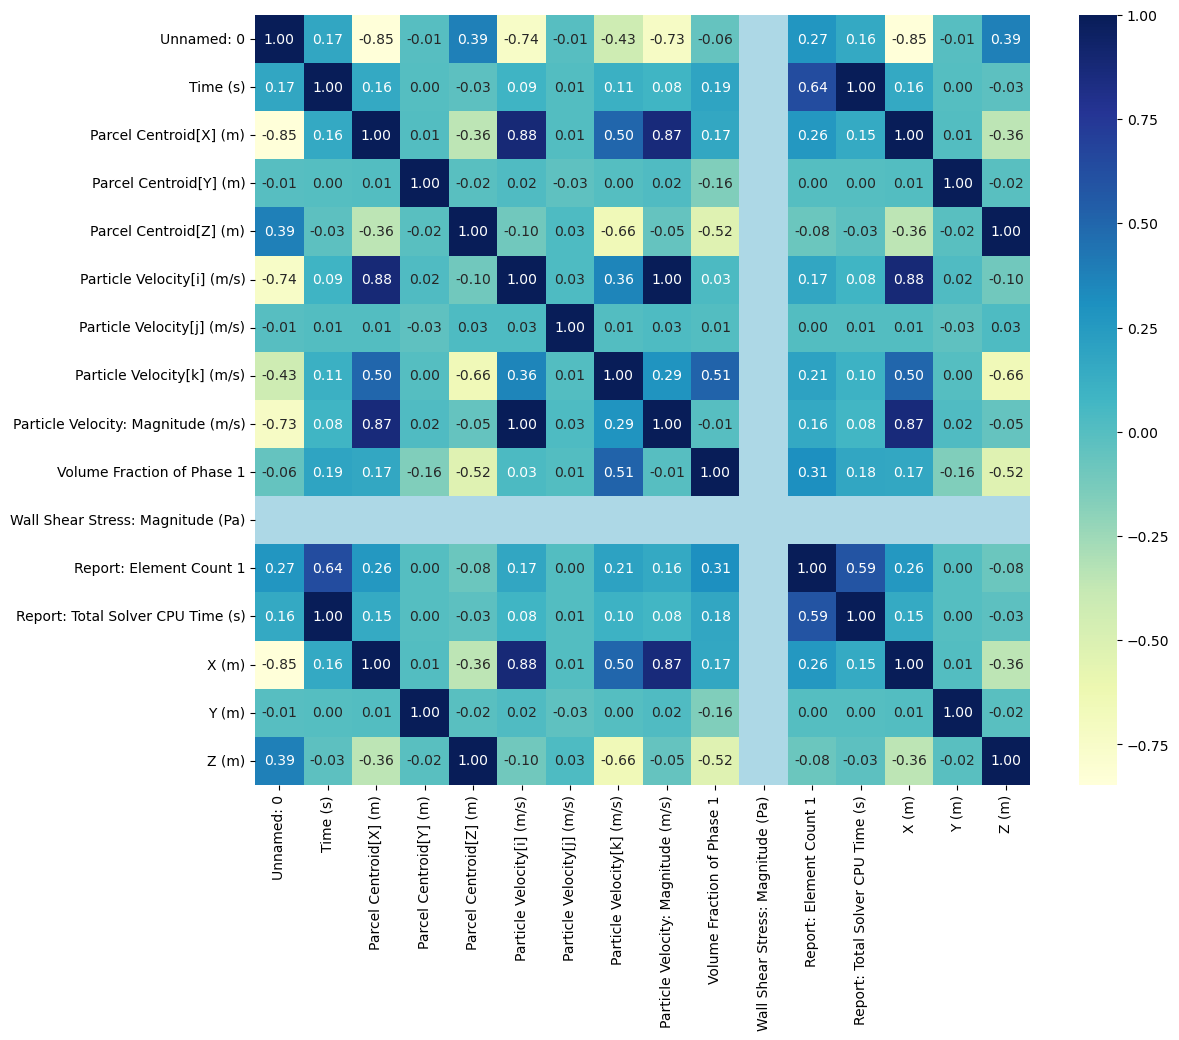

In [6]:
import seaborn as sns

corr_matrix =Granular_flow_data.corr()

fig, ax_corr_Matrix=plt.subplots(figsize=(12.5,10))

color = plt.get_cmap('YlGnBu')   # default color
color.set_bad('lightblue')  

ax =sns.heatmap(corr_matrix, 
                annot=True,
                fmt=".2f",
                cmap=color
               )
fig.savefig('./Correlation_matrix_for_the_data.png', bbox_inches='tight', dpi=1200)

## 2.2 Splitting the data

In [7]:

X=Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)', 'X (m)',	'Y (m)',	'Z (m)'], axis=1)
y= Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]


In [8]:
X

Unnamed: 0  Time (s)  Particle Velocity[i] (m/s)  \
0                 0      0.02                    0.576229   
1                 1      0.02                    0.575964   
2                 2      0.02                    0.576129   
3                 3      0.02                    0.576709   
4                 4      0.02                    0.576153   
...             ...       ...                         ...   
2549331       30688      1.94                    0.538780   
2549332       30689      1.94                    0.538740   
2549333       30690      1.94                    0.538617   
2549334       30691      1.94                    0.538617   
2549335       30692      1.94                    0.538576   

         Particle Velocity[j] (m/s)  Particle Velocity[k] (m/s)  \
0                      7.599137e-06                   -0.156682   
1                     -3.384995e-05                   -0.156740   
2                      8.063311e-05                   -0.156886   
3                     -4.113741e-04                   -0.155926   
4                      3.311456e-05                   -0.156845   
...                             ...                         ...   
2549331               -1.368647e-07                   -0.108018   
2549332               -1.495018e-07                   -0.107966   
2549333               -8.592227e-09                   -0.107811   
2549334               -2.634351e-08                   -0.107811   
2549335               -3.111577e-08                   -0.107759   

         Particle Velocity: Magnitude (m/s)  Volume Fraction of Phase 1  \
0                                  0.597151                    0.010824   
1                                  0.596911                    0.006975   
2                                  0.597108                    0.010824   
3                                  0.597417                    0.034522   
4                                  0.597121                    0.010824   
...                                     ...                         ...   
2549331                            0.549502                    0.085303   
2549332                            0.549452                    0.048624   
2549333                            0.549301                    0.048624   
2549334                            0.549301                    0.048624   
2549335                            0.549250                    0.085303   

         Wall Shear Stress: Magnitude (Pa)  Report: Element Count 1  \
0                                        0                     1128   
1                                        0                     1128   
2                                        0                     1128   
3                                        0                     1128   
4                                        0                     1128   
...                                    ...                      ...   
2549331                                  0                    30693   
2549332                                  0                    30693   
2549333                                  0                    30693   
2549334                                  0                    30693   
2549335                                  0                    30693   

         Report: Total Solver CPU Time (s)  
0                                    5.851  
1                                    5.851  
2                                    5.851  
3                                    5.851  
4                                    5.851  
...                                    ...  
2549331                          10464.548  
2549332                          10464.548  
2549333                          10464.548  
2549334                          10464.548  
2549335                          10464.548  

[2549336 rows x 10 columns]

In [9]:
y

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  \
0                     -0.113685                0.032540   
1                     -0.113686                0.025651   
2                     -0.113689                0.024866   
3                     -0.113687                0.038670   
4                     -0.113689                0.026663   
...                         ...                     ...   
2549331               -0.117254                0.033502   
2549332               -0.117258                0.022881   
2549333               -0.117269                0.031197   
2549334               -0.117269                0.032247   
2549335               -0.117272                0.032501   

         Parcel Centroid[Z] (m)  
0                      0.014828  
1                      0.007872  
2                      0.018086  
3                      0.008284  
4                      0.013483  
...                         ...  
2549331                0.009970  
2549332                0.013659  
2549333                0.021229  
2549334                0.012478  
2549335                0.003156  

[2549336 rows x 3 columns]

## 2.3 Checking if there is any missing value in our data
            * If there is any non-numerical value, we perform feature encoding
            * And/ or if there is any missing value, we perform imputation
            * If no missing value, then we continue to building the machine Learning Model

In [10]:
X.isna().sum()

Unnamed: 0                            0
Time (s)                              0
Particle Velocity[i] (m/s)            0
Particle Velocity[j] (m/s)            0
Particle Velocity[k] (m/s)            0
Particle Velocity: Magnitude (m/s)    0
Volume Fraction of Phase 1            0
Wall Shear Stress: Magnitude (Pa)     0
Report: Element Count 1               0
Report: Total Solver CPU Time (s)     0
dtype: int64

In [11]:
y.isna().sum()

Parcel Centroid[X] (m)    0
Parcel Centroid[Y] (m)    0
Parcel Centroid[Z] (m)    0
dtype: int64

# 3.0 Building and Training the Machine Learning Model for our Data

In [12]:
from sklearn.ensemble import RandomForestRegressor

model1 =RandomForestRegressor(n_estimators=90)
model1.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=90)>

In [13]:
%%time

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                   test_size=0.2)

model1.fit(X_train, y_train)

CPU times: total: 40min 28s
Wall time: 40min 30s


RandomForestRegressor(n_estimators=90)

## 3.1 Predicting with our model

In [14]:
y_preds=model1.predict(X_test)
  
y_preds


array([[-0.08180585,  0.03313254,  0.00944545],
       [-0.0362169 ,  0.02706516,  0.00364249],
       [ 0.00050476,  0.03541368,  0.00847162],
       ...,
       [-0.08176057,  0.03545032,  0.00568083],
       [-0.1054176 ,  0.03947768,  0.0118893 ],
       [-0.07917421,  0.03724353,  0.00170862]])

In [15]:
y_preds=pd.DataFrame(y_preds, columns=['Parcel Centroid[X] (m)',	'Parcel Centroid[Y] (m)',	'Parcel Centroid[Z] (m)'])
y_preds

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  Parcel Centroid[Z] (m)
0                    -0.081806                0.033133                0.009445
1                    -0.036217                0.027065                0.003642
2                     0.000505                0.035414                0.008472
3                    -0.012655                0.025812                0.007010
4                    -0.075699                0.025354                0.010153
...                        ...                     ...                     ...
509863               -0.112236                0.028816                0.017009
509864               -0.095983                0.026553                0.005095
509865               -0.081761                0.035450                0.005681
509866               -0.105418                0.039478                0.011889
509867               -0.079174                0.037244                0.001709

[509868 rows x 3 columns]

In [16]:
y_test

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  \
1005600               -0.081742                0.030417   
1823566               -0.037088                0.023278   
1697033               -0.000590                0.028368   
476614                -0.013147                0.027861   
2324546               -0.075164                0.025461   
...                         ...                     ...   
1687803               -0.112268                0.029478   
434432                -0.096856                0.024863   
2079249               -0.082477                0.036205   
184940                -0.105368                0.037392   
850165                -0.078698                0.035349   

         Parcel Centroid[Z] (m)  
1005600                0.009137  
1823566                0.003468  
1697033                0.007547  
476614                 0.006807  
2324546                0.009987  
...                         ...  
1687803                0.015825  
434432                 0.004679  
2079249                0.005218  
184940                 0.013821  
850165                 0.001776  

[509868 rows x 3 columns]

## 3.2 Scoring our model

In [17]:
model1.score(X_train, y_train)

0.9840768361024148

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error, 
          
         }
model1_scores={}

for key,value in metrics.items():
    model1_scores[key]=value(y_test, y_preds)

    
model1_scores

{'r-squared': 0.8860956444455201,
 'Mean absolute error (MAE)': 0.001390114821572169,
 'Mean squared error(MSE)': 4.0809066252400745e-06}

# 4.0 Plotting the Data
Plotting at the first time-index of the test data This is equivalent to the zeroth index
We can do the same for other indexes

In [19]:
actual_Xi = y_test.iloc[:, :1]
actual_Xj=y_test.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

predicted_Xi = y_preds.iloc[:, :1]
predicted_Xj = y_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


## 4.2 Separate plots of the Actual Granules Position and the Predicted Granules Position

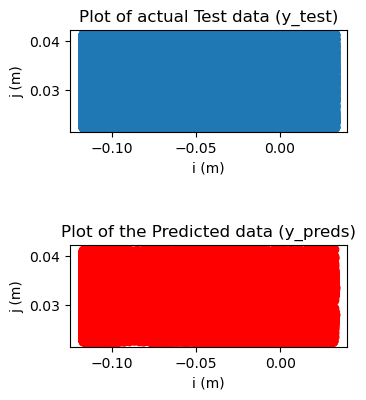

In [20]:
#Plotting the actual and Predicted positions 
# Plot the actual and predicted positions
#plt.scatter(actual_Xi, actual_Xj, color='blue', label='Actual')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,5))

ax1.scatter(actual_Xi, actual_Xj)
ax2.scatter(predicted_Xi, predicted_Xj, color='red')

ax1.set(title="Plot of actual Test data (y_test)", 
              xlabel='i (m)',
              ylabel='j (m)'
             )
fig.tight_layout(pad=5)

ax2.set(title= "Plot of the Predicted data (y_preds)", 
        xlabel= 'i (m)',
        ylabel='j (m)'
       )

plt.savefig("./Separate plots of Actual and Predicted granules Position.png", dpi=1200)

## 4.3 Plotting the Actual Granules Position against the Predicted Granules Position

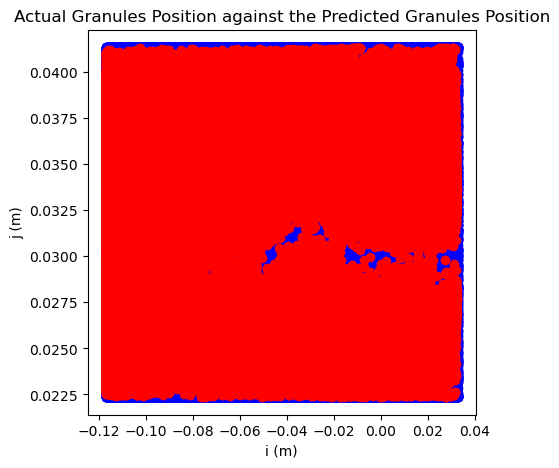

In [21]:
fig, ax3 =plt.subplots(1,1,figsize=(5,5))

ax3.scatter(actual_Xi, actual_Xj, color ='blue')

ax3.scatter(predicted_Xi, predicted_Xj, color='red')

ax3.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted.png', dpi=1200)

In [22]:
## 4.3 Plot of the Actual against the Predicted Granules position of the first 500 granules 

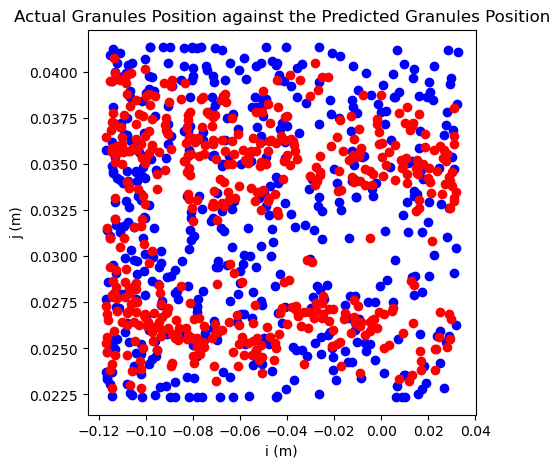

In [23]:
fig, ax4 =plt.subplots(1,1,figsize=(5,5))
plt.scatter(actual_Xi[:500], actual_Xj[:500], color ='blue')
plt.scatter(predicted_Xi[:500], predicted_Xj[:500], color='red')

ax4.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted.png', dpi=1200)

# 5.0 Using Linear Regression Model

In [24]:
%%time

from sklearn.linear_model import LinearRegression

model2=LinearRegression()

model2.get_params
model2.fit(X_train, y_train)


CPU times: total: 984 ms
Wall time: 801 ms


LinearRegression()

## 5.1 Making Prediction

In [25]:
yLinear_Preds=model2.predict(X_test)
yLinear_Preds

array([[-0.0790953 ,  0.03134648,  0.00707752],
       [-0.03276034,  0.03144013,  0.00350541],
       [-0.00260746,  0.03159513,  0.00911735],
       ...,
       [-0.07957969,  0.03171013,  0.0056538 ],
       [-0.10452812,  0.03232882,  0.01195244],
       [-0.07737424,  0.03171937,  0.00379831]])

In [26]:
yLinear_Preds=pd.DataFrame(yLinear_Preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yLinear_Preds

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  Parcel Centroid[Z] (m)
0                    -0.079095                0.031346                0.007078
1                    -0.032760                0.031440                0.003505
2                    -0.002607                0.031595                0.009117
3                    -0.014316                0.031196                0.006152
4                    -0.068706                0.035687                0.010475
...                        ...                     ...                     ...
509863               -0.113987                0.033506                0.011827
509864               -0.100516                0.031181                0.004044
509865               -0.079580                0.031710                0.005654
509866               -0.104528                0.032329                0.011952
509867               -0.077374                0.031719                0.003798

[509868 rows x 3 columns]

In [27]:
 y_test

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  \
1005600               -0.081742                0.030417   
1823566               -0.037088                0.023278   
1697033               -0.000590                0.028368   
476614                -0.013147                0.027861   
2324546               -0.075164                0.025461   
...                         ...                     ...   
1687803               -0.112268                0.029478   
434432                -0.096856                0.024863   
2079249               -0.082477                0.036205   
184940                -0.105368                0.037392   
850165                -0.078698                0.035349   

         Parcel Centroid[Z] (m)  
1005600                0.009137  
1823566                0.003468  
1697033                0.007547  
476614                 0.006807  
2324546                0.009987  
...                         ...  
1687803                0.015825  
434432                 0.004679  
2079249                0.005218  
184940                 0.013821  
850165                 0.001776  

[509868 rows x 3 columns]

## 5.2 Scoring the Linear Regression based model

In [28]:
model2.score(X_train, y_train)

0.5525760107407894

In [29]:
model2.score(X_test, y_test)

0.5525032801338102

## 5.3 Plots of the Actual vs  Predicted Granule Position Using the Linear Regression Model

In [30]:
LR_Pred_Xi=yLinear_Preds.iloc[:,:1]
LR_Pred_Xj=yLinear_Preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

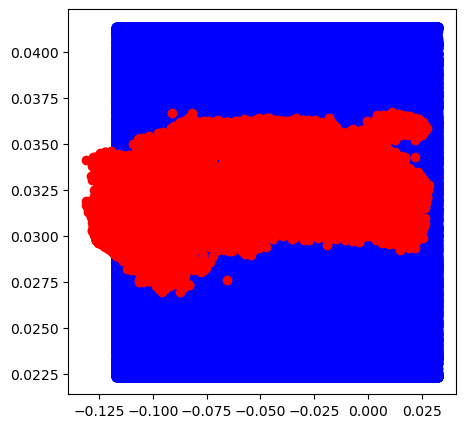

In [31]:
fig, ax5= plt.subplots(figsize=(5,5))

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')

plt.savefig('./LinearRegression_model.png', dpi=1200)

# 6.0 Using Ridge Regression

In [32]:
%%time

from sklearn.linear_model import Ridge

model3= Ridge()

model3.get_params

model3.fit(X_train, y_train)

CPU times: total: 297 ms
Wall time: 205 ms


Ridge()

In [33]:
yRidge_preds=model3.predict(X_test)
yRidge_preds

array([[-0.07910939,  0.03134625,  0.00707261],
       [-0.03275009,  0.03144077,  0.00350907],
       [-0.0026604 ,  0.03159238,  0.00909959],
       ...,
       [-0.07958057,  0.03170998,  0.00565379],
       [-0.10447512,  0.0323298 ,  0.01197182],
       [-0.07738123,  0.03171921,  0.0037957 ]])

In [34]:
yRidge_preds=pd.DataFrame(yRidge_preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yRidge_preds

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  Parcel Centroid[Z] (m)
0                    -0.079109                0.031346                0.007073
1                    -0.032750                0.031441                0.003509
2                    -0.002660                0.031592                0.009100
3                    -0.014340                0.031195                0.006144
4                    -0.068737                0.035683                0.010465
...                        ...                     ...                     ...
509863               -0.114011                0.033504                0.011819
509864               -0.100506                0.031182                0.004048
509865               -0.079581                0.031710                0.005654
509866               -0.104475                0.032330                0.011972
509867               -0.077381                0.031719                0.003796

[509868 rows x 3 columns]

In [35]:
y_test

Parcel Centroid[X] (m)  Parcel Centroid[Y] (m)  \
1005600               -0.081742                0.030417   
1823566               -0.037088                0.023278   
1697033               -0.000590                0.028368   
476614                -0.013147                0.027861   
2324546               -0.075164                0.025461   
...                         ...                     ...   
1687803               -0.112268                0.029478   
434432                -0.096856                0.024863   
2079249               -0.082477                0.036205   
184940                -0.105368                0.037392   
850165                -0.078698                0.035349   

         Parcel Centroid[Z] (m)  
1005600                0.009137  
1823566                0.003468  
1697033                0.007547  
476614                 0.006807  
2324546                0.009987  
...                         ...  
1687803                0.015825  
434432                 0.004679  
2079249                0.005218  
184940                 0.013821  
850165                 0.001776  

[509868 rows x 3 columns]

In [36]:
model3.score(X_train, y_train)

0.5525725319525855

In [37]:
model3.score(X_test, y_test)

0.5524990408474676

## 6.3 Plotting the graph of Actual against Predicted for the Ridge regression Model

In [38]:
RR_preds_Xi= yRidge_preds.iloc[:,:1]
RR_preds_Xj= yRidge_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


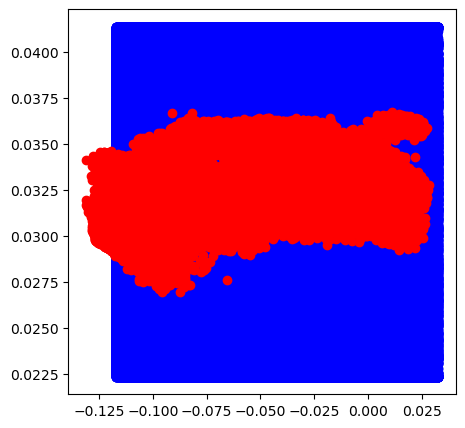

In [39]:
fig, ax6= plt.subplots(figsize=(5,5))

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')

plt.savefig('./Ridge Model plot.png', dpi=1200)

# 7 Using SVR

In [40]:
from sklearn.svm import SVR

model4= SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

model4.get_params

model4.fit(X_train, y_train.iloc[:, 0]) # can not capture the 2D array of y, it can predict for 1D

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [41]:
y_train.iloc[:, 0]

1480373    0.005938
2114302   -0.099002
2194176   -0.038237
755720    -0.064668
598417    -0.029842
             ...   
110268    -0.096571
1692743    0.011038
2356330   -0.085467
2229084   -0.067794
2219110   -0.011003
Name: Parcel Centroid[X] (m), Length: 2039468, dtype: float64

In [42]:
y_train.iloc[:, 0].shape

(2039468,)

In [43]:
y_train.shape

(2039468, 3)

In [44]:
model4.score(X_test, y_test.iloc[:,:1])

-0.0717779736029478

In [45]:
pd.DataFrame(model4.predict(X_test))

0
0      -0.042271
1      -0.042271
2      -0.042271
3      -0.042271
4      -0.042271
...          ...
509863 -0.042271
509864 -0.042271
509865 -0.042271
509866 -0.042271
509867 -0.042271

[509868 rows x 1 columns]

In [46]:
y_test.iloc[:,0]

1005600   -0.081742
1823566   -0.037088
1697033   -0.000590
476614    -0.013147
2324546   -0.075164
             ...   
1687803   -0.112268
434432    -0.096856
2079249   -0.082477
184940    -0.105368
850165    -0.078698
Name: Parcel Centroid[X] (m), Length: 509868, dtype: float64

# 8.0 Comparing all the Regression Models

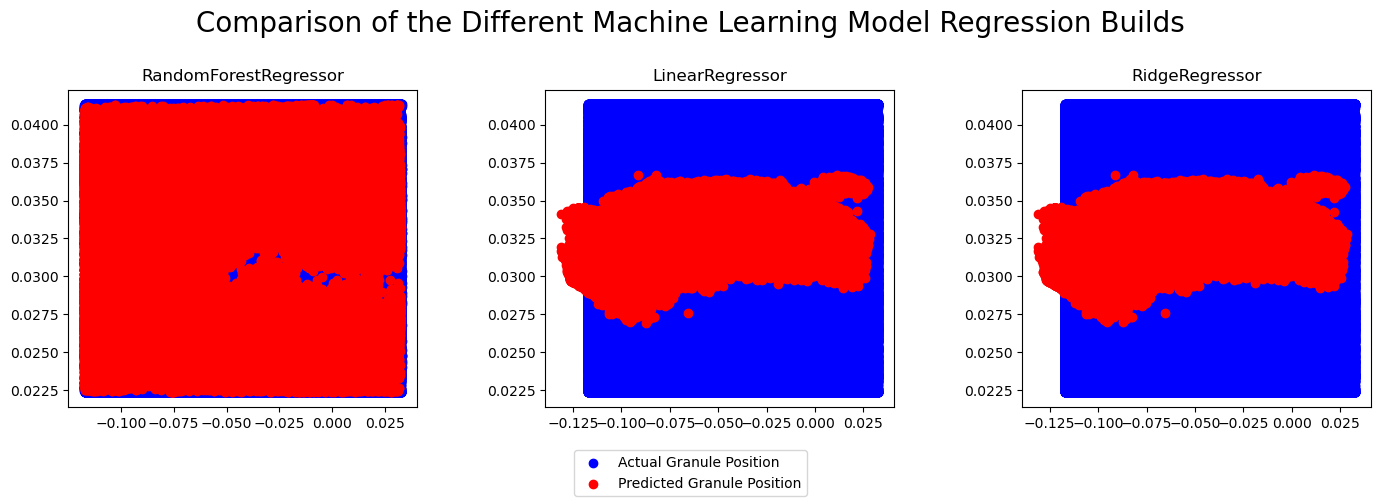

In [47]:
fig, (ax3, ax5, ax6) =plt.subplots(1,3,figsize=(15,5))


l1=ax3.scatter(actual_Xi, actual_Xj, color ='blue')
l2=ax3.scatter(predicted_Xi, predicted_Xj, color='red')
ax3.set(title='RandomForestRegressor')

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')
ax5.set(title='LinearRegressor')

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')
ax6.set(title='RidgeRegressor')

fig.tight_layout(pad=5.0)
fig.legend(['Actual Granule Position', 'Predicted Granule Position'], loc='lower center')
fig.suptitle('Comparison of the Different Machine Learning Model Regression Builds', fontsize=20)
plt.savefig('./Comparison of the Different Machine Learning Model Regression Builds.png', dpi=1200)

# RandomSearchCV

In [48]:
%%time

from sklearn.model_selection import RandomizedSearchCV

RndmFrst_grid={"n_estimators": np.arange(10,100,10),
               "max_depth":[None]
              }

RndmSrch_RndmFrst=RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions= RndmFrst_grid,
                              cv=5,
                              verbose= 10
                             )
RndmSrch_RndmFrst.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 1/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 2/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 2/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 3/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 3/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 4/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 4/5; 1/9] END max_depth=None, n_estimators=10;, score=0.875 total time= 3.3min
[CV 5/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 5/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 1/5; 2/9] START max_depth=None, n_estimators=20.............................
[CV 1/5; 2/9] END max_depth=None, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=10)

In [49]:
RndmSrch_RndmFrst.best_params_

{'n_estimators': 90, 'max_depth': None}

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

GridSrch_RndmFrst= GridSearchCV(RandomForestRegressor(),
                                param_grid=RndmFrst_grid,
                                cv=5,
                                verbose=10)
GridSrch_RndmFrst.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 1/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 2/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 2/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 3/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 3/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 4/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 4/5; 1/9] END max_depth=None, n_estimators=10;, score=0.875 total time= 3.3min
[CV 5/5; 1/9] START max_depth=None, n_estimators=10.............................
[CV 5/5; 1/9] END max_depth=None, n_estimators=10;, score=0.876 total time= 3.3min
[CV 1/5; 2/9] START max_depth=None, n_estimators=20.............................
[CV 1/5; 2/9] END max_depth=None, n_est

In [ ]:
GridSrch_RndmFrst.best_params_

## Making Use of the RandomizedSearchCV RandomForest Best_params for predicting our data

In [ ]:
improved_model1=RandomForestRegressor(90,max_depth=None)
improved_model1

improved_model1.fit(X_train,y_train)

In [ ]:
improvedModel_yPreds=improved_model1.predict(X_test)
improvedModel_yPreds

# Evaluating the tuned model

 *The problem in question is that of regression and not classification, so we need to use the Regression metrics.
    https://scikit-learn.org/stable/modules/model_evaluation.html
    * The metrics used in this study are:
            > R-squared score (r-squared)
            > Mean absolute error (MAE)
            > Mean squared error (MSE)
            > Root mean squared error (RMSE)
            > Max error
            

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error, 
          
         }

Improved_model1_scores={}

for key,value in metrics.items():
   Improved_model1_scores[key]= value(y_test, improvedModel_yPreds).astype("float")

Improved_model1_scores

# Comparing these values with the values obtained before Tuning the Machine learning model

Recalling the score values of both models

In [ ]:
model1_scores

In [ ]:
Improved_model1_scores

## Finding the Difference

In [ ]:
score_differences=(np.array(list(Improved_model1_scores.values()))-np.array(list(model1_scores.values())))
score_differences

## Showing the difference in a table

In [ ]:
pd.DataFrame([score_differences] ,columns=[['R-squared diff','Mean absolute error (MAE) diff' ,'Mean squared error(MSE) diff']])

# Performing Feature Importance
    Feature importance is a model inspection technique that measures the contribution of each feature to a fitted model's statistical performance on a given tabular dataset .

In [ ]:
feature_importance = improved_model1.feature_importances_
feature_importances= feature_importance[:20]

In [ ]:
plt.barh( X_train.columns, feature_importances)
plt.savefig('./Graph Showing Feature Importance.pdf', dpi=1200, format= 'pdf')

# Predicting the velocity

In [ ]:
U=Granular_flow_data.drop(["Parcel Centroid[X] (m)", "Parcel Centroid[Y] (m)", "Parcel Centroid[Z] (m)", "Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)", "Particle Velocity: Magnitude (m/s)"], axis=1)
U

In [ ]:
U["Wall Shear Stress: Magnitude (Pa)"].describe()

In [ ]:
v=Granular_flow_data[["Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)"]]
v

In [ ]:
%%time

U_train, U_test, v_train, v_test=train_test_split(U,v,
                                                  test_size=0.2, 
                                                  random_state=42)

velocity_model1= RandomForestRegressor(n_estimators=200)
velocity_model1.fit(U_train, v_train)

In [ ]:
velocity_model1.score(U_test, v_test)

# Using Multi-layer Percerptron Regressor (MLP Regressor)

In [ ]:
%%time

from sklearn.neural_network import MLPRegressor


MLP= MLPRegressor(random_state=42)

MLP.fit(U_train, v_train)

In [ ]:
MLP.score(X=U_test,y=v_test)